<a href="https://colab.research.google.com/github/pavan-kumar96/Projects/blob/master/Lab_dashboard_txn_campaign_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel("/content/book.xlsx")



In [2]:
data.dropna(inplace = True)

In [3]:
new_data = data[data.payment_done!=0]

In [4]:
sep_data_1= new_data[(new_data.Date<'2021-09-07') & (new_data.Date>'2021-08-30')]

In [5]:
sep_data_2 = new_data[new_data.Date >'2021-09-06' ]

In [6]:
sep_w1 = sep_data_1.utm_campaign.value_counts().to_frame().reset_index().rename(columns = {"index":"camp_name",'utm_campaign':'count_w1'})
sep_w2 = sep_data_2.utm_campaign.value_counts().to_frame().reset_index().rename(columns = {"index":"camp_name",'utm_campaign':'count_w2'})

In [7]:
result = pd.merge(sep_w1, sep_w2, on="camp_name")

In [8]:
result['txn_difference_week'] = result.count_w1-result.count_w2

In [29]:
### Last Week and this week Txns

last_week_txn = result.count_w1.sum()

This_week_txn = result.count_w2.sum()

**Last Week Txns are 141**


**This Week txn are 134**

In [34]:
fall_camps= result[result.txn_difference_week>0]



# Showing the Campaign Where the Txn are down compare to last week



Text(0, 0.5, 'No. of transctions')

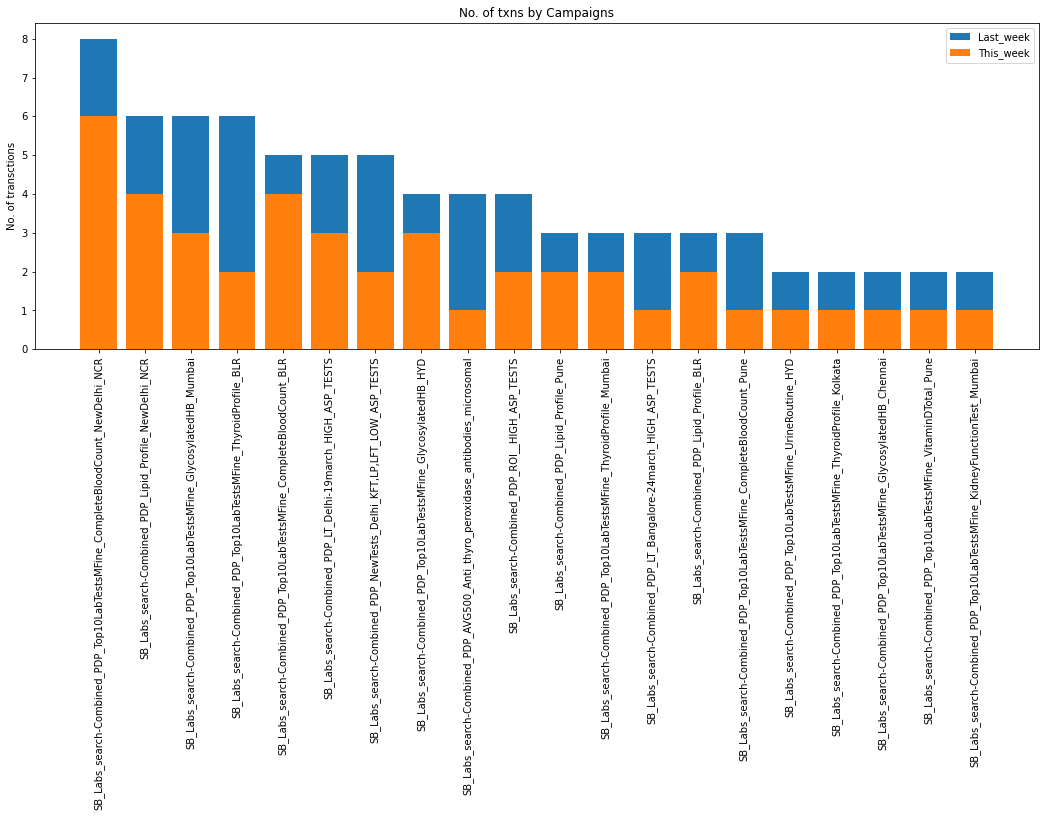

In [39]:
plt.figure(figsize = (18,6))
plt.bar(x= fall_camps.camp_name, height=fall_camps.count_w1)
plt.bar(x= fall_camps.camp_name, height=fall_camps.count_w2)
plt.xticks(rotation=90)
plt.legend(['Last_week','This_week'])
plt.title("No. of txns by Campaigns")
plt.ylabel("No. of transctions")

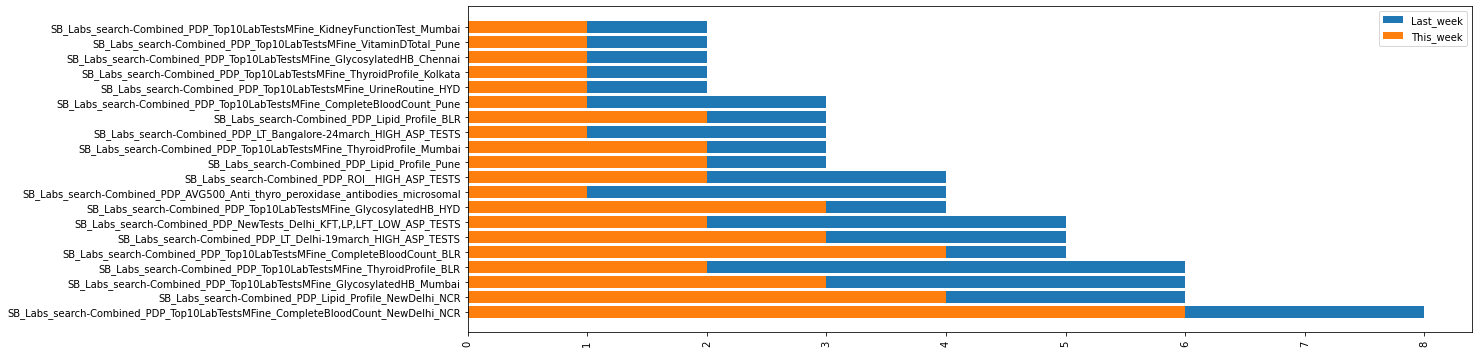

In [36]:
plt.figure(figsize = (18,6))
plt.barh(y=fall_camps.camp_name, width=fall_camps.count_w1)
plt.barh(y =fall_camps.camp_name, width=fall_camps.count_w2)
plt.xticks(rotation=90)
plt.legend(['Last_week','This_week'])

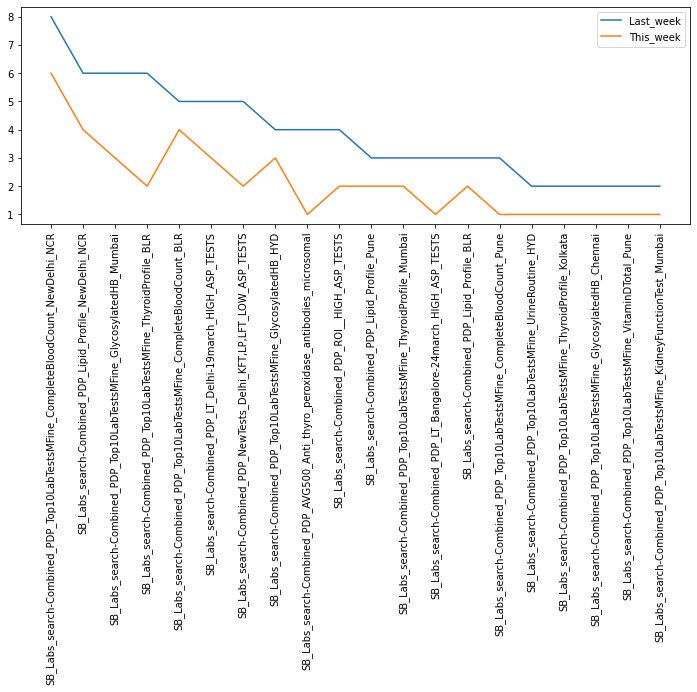

In [37]:
plt.figure(figsize = (12,4))
plt.plot(fall_camps.camp_name, fall_camps.count_w1)
plt.plot(fall_camps.camp_name, fall_camps.count_w2)
plt.xticks(rotation=90)
plt.legend(['Last_week','This_week'])

In [40]:
from google.colab import files
fall_camps.to_csv('Campaign_fall.csv') 
files.download('Campaign_fall.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
from google.colab import files
result.to_csv('Campaign_performance_txn.csv') 
files.download('Campaign_performance_txn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>